In [123]:
#import libraries
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [124]:
from sklearn.decomposition import PCA

In [125]:
import pkg_resources
pkg_resources.get_distribution("cmapPy").version

'4.0.1'

In [126]:
#parsing gct data to python using cmapPy
from cmapPy.pandasGEXpress.parse import parse
data_row = parse('PAAD.gct').data_df
data_col = parse('PAAD.gct',col_meta_only=True).T

In [127]:
data_row = data_row.set_index(data_row.axes[0])
data_row.head()

cid,aab1-Primary solid Tumor,aab4-Primary solid Tumor,aab6-Primary solid Tumor,aab8-Primary solid Tumor,aab9-Primary solid Tumor,aaba-Primary solid Tumor,aabe-Primary solid Tumor,aabf-Primary solid Tumor,aabh-Primary solid Tumor,aabi-Primary solid Tumor,...,aauh-Primary solid Tumor,aaui-Primary solid Tumor,aaul-Primary solid Tumor,a8t3-Primary solid Tumor,a8t5-Primary solid Tumor,a89d-Solid Tissue Normal,a89d-Primary solid Tumor,a8sy-Primary solid Tumor,a8lh-Primary solid Tumor,aapl-Primary solid Tumor
rid,,,,,,,,,,,,,,,,,,,,,
SLC35E2,7.45,8.1,7.2,8.0,7.65,8.1,8.2,8.2,7.55,8.45,...,8.45,7.95,8.3,8.05,8.2,7.25,7.4,7.35,7.2,9.05
A1BG,6.40,5.8,6.4,5.8,6.70,6.6,6.3,6.5,5.70,6.30,...,7.10,7.10,6.7,7.00,6.9,7.10,7.3,7.90,6.0,6.90
A1CF,4.70,5.7,3.0,5.1,4.40,4.2,1.6,6.8,6.00,NaN,...,5.40,6.40,6.5,4.40,3.3,3.60,6.2,1.20,4.9,2.00
A2BP1,-1.00,1.1,NaN,NaN,0.10,NaN,NaN,1.7,0.40,-1.50,...,3.50,1.30,-0.3,NaN,2.1,2.00,0.0,NaN,2.0,NaN
A2LD1,7.50,6.8,7.3,7.5,7.40,6.6,7.1,6.8,8.00,5.80,...,6.50,7.30,6.1,6.70,6.5,6.70,6.7,6.50,6.9,6.70


In [128]:
data_col.head(5)

cid,aab1-Primary solid Tumor,aab4-Primary solid Tumor,aab6-Primary solid Tumor,aab8-Primary solid Tumor,aab9-Primary solid Tumor,aaba-Primary solid Tumor,aabe-Primary solid Tumor,aabf-Primary solid Tumor,aabh-Primary solid Tumor,aabi-Primary solid Tumor,...,aauh-Primary solid Tumor,aaui-Primary solid Tumor,aaul-Primary solid Tumor,a8t3-Primary solid Tumor,a8t5-Primary solid Tumor,a89d-Solid Tissue Normal,a89d-Primary solid Tumor,a8sy-Primary solid Tumor,a8lh-Primary solid Tumor,aapl-Primary solid Tumor
chd,,,,,,,,,,,,,,,,,,,,,
participant_id,aab1,aab4,aab6,aab8,aab9,aaba,aabe,aabf,aabh,aabi,...,aauh,aaui,aaul,a8t3,a8t5,a89d,a89d,a8sy,a8lh,aapl
sample_type,Primary solid Tumor,Primary solid Tumor,Primary solid Tumor,Primary solid Tumor,Primary solid Tumor,Primary solid Tumor,Primary solid Tumor,Primary solid Tumor,Primary solid Tumor,Primary solid Tumor,...,Primary solid Tumor,Primary solid Tumor,Primary solid Tumor,Primary solid Tumor,Primary solid Tumor,Solid Tissue Normal,Primary solid Tumor,Primary solid Tumor,Primary solid Tumor,Primary solid Tumor
mRNAseq_cluster,1,2,3,1,4,3,3,2,2,3,...,2,5,3,4,5,NaN,2,3,1,5
bcr_patient_barcode,tcga-2j-aab1,tcga-2j-aab4,tcga-2j-aab6,tcga-2j-aab8,tcga-2j-aab9,tcga-2j-aaba,tcga-2j-aabe,tcga-2j-aabf,tcga-2j-aabh,tcga-2j-aabi,...,tcga-xd-aauh,tcga-xd-aaui,tcga-xd-aaul,tcga-xn-a8t3,tcga-xn-a8t5,tcga-yb-a89d,tcga-yb-a89d,tcga-yh-a8sy,tcga-yy-a8lh,tcga-z5-aapl
bcr_patient_uuid,75119d1a-93e5-4ae7-9d60-69ee929a0772,33833131-1482-42d5-9cf5-01cade540234,70797499-16e6-48cc-8ae4-1e692713dad3,2e8f90f4-aed3-43b0-985c-dfdc2581f24f,a5748656-5330-417a-8938-01f69ddb3576,e3a19e63-bae5-498b-9687-41194aa5728d,58c1c391-5ea3-4432-bb1e-e7e1974954bc,886d6116-d496-444f-9b7b-7449dad31055,c53328b4-0930-4e6a-a648-283b5565295e,2aaf212f-000a-4a9d-8a4a-198fa94f491e,...,b46b5a4c-59fc-4769-b05a-d15f9aaa753a,9a2db69e-d429-45d4-89ca-a2c4e0cfc116,597a5a56-244b-4218-a55d-5d08217ea28c,dd7bcdd8-1660-4dab-9860-9d136c4cee77,382b279f-87e1-4dbc-a2ca-c1dfde1cf254,b84b58c7-95b8-4162-8e61-414f8fe422c6,b84b58c7-95b8-4162-8e61-414f8fe422c6,503d7e36-df78-428d-9971-09ff707645c2,ede2e8a7-465e-4725-880d-519899aba0c0,6a4e10b6-e6c4-4210-ae4d-0d8e8d0cb3ec


In [129]:
data_col.shape

(124, 183)

In [130]:
#finding the total 'NaN' values
data_row.isnull().sum().sum()

134954

In [131]:
#Deleting 'NaN' values
data_row = data_row.dropna()

In [132]:
# Rechecking the total no. of 'NaN' values left
data_row.isnull().sum().sum()

0

In [133]:
data_col = data_col.loc[['histological_type','histological_type_other']]

In [134]:
data_col.head()

cid,aab1-Primary solid Tumor,aab4-Primary solid Tumor,aab6-Primary solid Tumor,aab8-Primary solid Tumor,aab9-Primary solid Tumor,aaba-Primary solid Tumor,aabe-Primary solid Tumor,aabf-Primary solid Tumor,aabh-Primary solid Tumor,aabi-Primary solid Tumor,...,aauh-Primary solid Tumor,aaui-Primary solid Tumor,aaul-Primary solid Tumor,a8t3-Primary solid Tumor,a8t5-Primary solid Tumor,a89d-Solid Tissue Normal,a89d-Primary solid Tumor,a8sy-Primary solid Tumor,a8lh-Primary solid Tumor,aapl-Primary solid Tumor
chd,,,,,,,,,,,,,,,,,,,,,
histological_type,pancreas-adenocarcinoma-other subtype,pancreas-adenocarcinoma-other subtype,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma-other subtype,pancreas-adenocarcinoma-other subtype,...,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma-other subtype,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type,NaN,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type
histological_type_other,invasive adenocarcinoma,"invasive, well-differentiated",NaN,NaN,NaN,NaN,NaN,NaN,invasive adenocarcinoma,poorly differentiated adenocarcinoma,...,NaN,NaN,NaN,NaN,moderately differentiated ductal adenocarcinom...,NaN,NaN,NaN,NaN,NaN


In [135]:
for i in range(len(data_col.index)):
    print("NaN in row" , i , ":" , data_col.iloc[i].isnull().sum())

NaN in row 0 : 1
NaN in row 1 : 156


In [136]:
data_col.loc['histological_type'].mode()

0    pancreas-adenocarcinoma ductal type
dtype: object

In [137]:
data_col.loc['histological_type'].fillna('pancreas-adenocarcinoma ductal type',inplace = True)
data_col.loc['histological_type_other'].fillna('pancreas-adenocarcinoma ductal type',inplace = True)

In [138]:
data_col.isnull().sum().sum()

0

In [139]:
data_col.head()

cid,aab1-Primary solid Tumor,aab4-Primary solid Tumor,aab6-Primary solid Tumor,aab8-Primary solid Tumor,aab9-Primary solid Tumor,aaba-Primary solid Tumor,aabe-Primary solid Tumor,aabf-Primary solid Tumor,aabh-Primary solid Tumor,aabi-Primary solid Tumor,...,aauh-Primary solid Tumor,aaui-Primary solid Tumor,aaul-Primary solid Tumor,a8t3-Primary solid Tumor,a8t5-Primary solid Tumor,a89d-Solid Tissue Normal,a89d-Primary solid Tumor,a8sy-Primary solid Tumor,a8lh-Primary solid Tumor,aapl-Primary solid Tumor
chd,,,,,,,,,,,,,,,,,,,,,
histological_type,pancreas-adenocarcinoma-other subtype,pancreas-adenocarcinoma-other subtype,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma-other subtype,pancreas-adenocarcinoma-other subtype,...,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma-other subtype,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type
histological_type_other,invasive adenocarcinoma,"invasive, well-differentiated",pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type,invasive adenocarcinoma,poorly differentiated adenocarcinoma,...,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type,moderately differentiated ductal adenocarcinom...,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type


In [140]:
data_col.iloc[1].unique()

array(['invasive adenocarcinoma', 'invasive, well-differentiated',
       'pancreas-adenocarcinoma ductal type',
       'poorly differentiated adenocarcinoma', 'neuroendocrine',
       'neuroendocrine carcinoma nos',
       '82463 neuroendocrine carcinoma nos', 'neuroendocrine carcinoma',
       'adenocarcinoma, nos',
       'poorly differentiated pancreatic adenocarcinoma', 'not specified',
       'intraductal tubulopapillary neoplasm',
       'ductal and micropapillary', 'adenocarcinoma- nos',
       'moderately differentiated ductal adenocarcinoma 60% + neuroendocrine 40%'],
      dtype=object)

In [141]:
dataset = data_row.transpose()

In [142]:
dataset.head()

rid,SLC35E2,A1BG,A2LD1,A2M,A4GALT,AAAS,AACS,AADAT,AAGAB,AAK1,...,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11B,ZYX,ZZEF1,ZZZ3
cid,,,,,,,,,,,,,,,,,,,,,
aab1-Primary solid Tumor,7.45,6.4,7.5,14.3,10.6,9.4,10.2,4.8,10.2,9.6,...,8.6,8.1,8.6,6.2,9.0,9.9,9.2,12.9,10.1,9.3
aab4-Primary solid Tumor,8.10,5.8,6.8,14.0,10.2,9.1,10.3,6.3,10.4,9.8,...,8.7,8.1,8.8,5.8,8.5,10.0,9.3,12.4,9.8,8.9
aab6-Primary solid Tumor,7.20,6.4,7.3,13.1,10.1,9.7,9.2,5.9,9.9,9.8,...,8.8,8.4,9.1,3.9,8.1,10.0,9.4,13.5,9.8,9.2
aab8-Primary solid Tumor,8.00,5.8,7.5,13.8,8.6,9.6,9.4,6.4,10.5,9.2,...,8.6,8.6,8.9,5.2,8.5,9.7,9.4,12.5,9.7,9.3
aab9-Primary solid Tumor,7.65,6.7,7.4,14.6,10.1,9.8,9.3,6.5,10.1,9.8,...,8.9,8.2,8.4,5.9,8.6,9.9,9.3,13.0,10.1,9.2


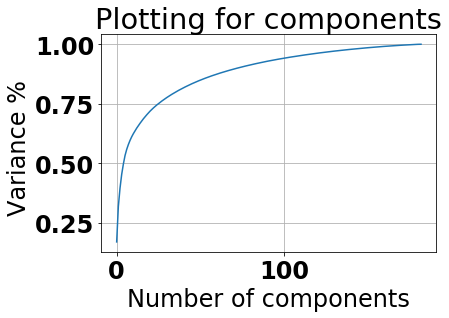

In [143]:
#VISUALIZING USING PCA 

pca = PCA().fit(dataset)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.grid()
plt.xlabel('Number of components')
plt.ylabel('Variance % ')
plt.title('Plotting for components')
plt.show()

In [144]:
#applying pca to datasets

components = 125
pca= PCA(components)
df = pca.fit_transform(dataset)

In [145]:
pca.explained_variance_ratio_.cumsum()

array([0.17050831, 0.3189652 , 0.39602359, 0.45375443, 0.49700183,
       0.5329874 , 0.55876165, 0.57924666, 0.59671262, 0.61180166,
       0.62494914, 0.63670335, 0.64821223, 0.65853729, 0.66853474,
       0.67816812, 0.6873113 , 0.69577688, 0.70404649, 0.71189046,
       0.71947349, 0.72635291, 0.7329375 , 0.73919909, 0.74517387,
       0.75071808, 0.75621903, 0.76157595, 0.76672019, 0.77170027,
       0.77643312, 0.78101873, 0.7855184 , 0.78994316, 0.79415146,
       0.79833513, 0.80242807, 0.80628098, 0.81004003, 0.8137596 ,
       0.81736123, 0.82092182, 0.82438381, 0.82780639, 0.83111099,
       0.83434445, 0.83750679, 0.84054777, 0.84354317, 0.84649454,
       0.84933978, 0.85215033, 0.85492685, 0.85758905, 0.8602141 ,
       0.86278132, 0.86532677, 0.86778843, 0.87018809, 0.8725661 ,
       0.87489474, 0.87714748, 0.87936837, 0.88156146, 0.88370002,
       0.88578412, 0.88785089, 0.88990022, 0.89191072, 0.89385907,
       0.89578675, 0.89767288, 0.89952952, 0.9013741 , 0.90318

In [146]:
df.shape

(183, 125)

In [147]:
df1=pd.DataFrame(df,columns=['PCA'+str(i) for i in range(1,components+1)],index=None)

In [148]:
df1.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,...,PCA116,PCA117,PCA118,PCA119,PCA120,PCA121,PCA122,PCA123,PCA124,PCA125
0,19.377602,-14.983461,-2.223560,-29.369322,1.294313,-0.555344,-13.681491,-10.432153,-0.366910,-5.873948,...,-4.672977,-0.348397,2.950378,-0.565987,-1.716186,0.964293,0.321292,7.416451,0.432741,2.633083
1,6.459739,-7.324452,-1.891195,-27.630188,-16.984523,6.185806,6.002576,-13.808434,-11.949466,-14.810992,...,-4.633074,10.625794,-1.247899,-5.498195,-2.552337,0.886264,1.770697,1.844511,3.518568,-1.507912
2,22.107028,-12.287158,-8.406870,52.940943,-28.743129,-6.388730,12.774998,-13.569373,-22.681700,1.003885,...,1.782676,-2.022630,3.178284,-0.819454,0.061949,-2.166613,1.191771,-2.419631,-2.113408,-1.111624
3,14.004186,-25.846380,2.487067,13.669215,-4.051808,13.900233,-19.943554,6.014179,9.325528,9.484742,...,-3.191070,2.495937,6.672929,2.810399,-2.196888,-5.168011,1.036498,1.966618,-2.378801,2.675381
4,-14.081426,-4.000459,-13.408861,-10.858805,-13.067221,-16.657837,20.383552,9.752669,-0.402853,-2.505441,...,-0.142175,-0.699456,6.473679,-5.003856,2.554085,-3.168860,2.536765,7.780599,0.808492,-3.675134


In [149]:
df1.describe()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,...,PCA116,PCA117,PCA118,PCA119,PCA120,PCA121,PCA122,PCA123,PCA124,PCA125
count,1.830000e+02,1.830000e+02,1.830000e+02,1.830000e+02,1.830000e+02,1.830000e+02,1.830000e+02,1.830000e+02,1.830000e+02,1.830000e+02,...,1.830000e+02,1.830000e+02,1.830000e+02,1.830000e+02,1.830000e+02,1.830000e+02,1.830000e+02,1.830000e+02,1.830000e+02,1.830000e+02
mean,-1.164824e-15,-7.280151e-16,3.533300e-15,2.368476e-15,-7.765494e-17,-3.494472e-16,7.571357e-16,8.930319e-16,-4.513694e-16,5.120373e-16,...,2.426717e-17,5.945457e-16,-5.065772e-16,-1.523978e-15,-8.978853e-16,-8.432842e-17,-1.140557e-16,1.358962e-15,-1.213358e-16,7.619891e-16
std,4.284278e+01,3.997653e+01,2.880148e+01,2.492923e+01,2.157669e+01,1.968199e+01,1.665704e+01,1.484988e+01,1.371201e+01,1.274488e+01,...,3.215479e+00,3.205889e+00,3.197181e+00,3.161576e+00,3.145666e+00,3.117280e+00,3.090079e+00,3.084693e+00,3.058978e+00,3.035521e+00
min,-9.902540e+01,-4.500110e+01,-7.530460e+01,-4.727105e+01,-3.511936e+01,-6.895490e+01,-2.739740e+01,-3.490054e+01,-4.780983e+01,-4.126018e+01,...,-9.182202e+00,-8.469116e+00,-7.528301e+00,-8.015344e+00,-7.703585e+00,-1.167596e+01,-9.578944e+00,-8.635432e+00,-9.568429e+00,-8.300526e+00
25%,-3.117554e+01,-1.801936e+01,-1.509016e+01,-1.672742e+01,-1.203233e+01,-1.003183e+01,-1.161218e+01,-1.037354e+01,-7.151987e+00,-7.112199e+00,...,-2.249079e+00,-1.779379e+00,-1.923407e+00,-2.194306e+00,-2.172966e+00,-2.041291e+00,-1.392368e+00,-1.696365e+00,-2.115826e+00,-1.940168e+00
50%,-1.104452e+00,-7.984542e+00,-2.223560e+00,-2.885064e+00,-3.557351e+00,2.255364e+00,-2.430885e+00,3.665053e-01,1.351468e+00,-9.135701e-01,...,6.302271e-02,-2.414345e-01,-2.191892e-01,9.159687e-02,2.491443e-02,-9.657113e-02,7.996906e-02,-1.618595e-01,7.010884e-03,-1.192817e-01
75%,2.966067e+01,1.964055e+00,1.880219e+01,1.292634e+01,6.722829e+00,1.179177e+01,9.619986e+00,9.174939e+00,8.630051e+00,5.784130e+00,...,1.842866e+00,1.889109e+00,1.726188e+00,1.846389e+00,2.085101e+00,1.250638e+00,1.785154e+00,1.847733e+00,2.043200e+00,1.864665e+00
max,1.502809e+02,2.163249e+02,7.991290e+01,1.111217e+02,1.361720e+02,7.073761e+01,5.835242e+01,5.754818e+01,6.552876e+01,5.291524e+01,...,1.004967e+01,1.089077e+01,8.613672e+00,1.035409e+01,1.237188e+01,1.253420e+01,1.017251e+01,8.786068e+00,1.060583e+01,1.237084e+01


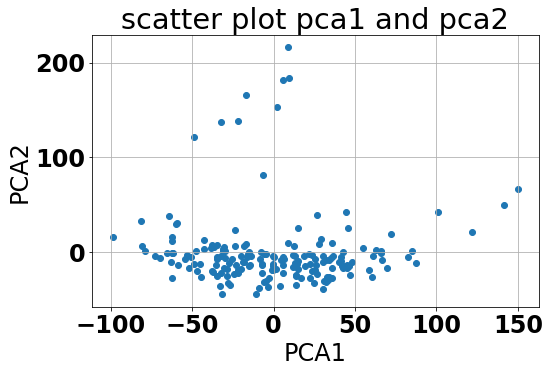

In [150]:
#scatter plot pca1 and pca2
plt.figure(figsize=(8,5))
plt.scatter(df1['PCA1'],df1['PCA2'])
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('scatter plot pca1 and pca2')
plt.grid()
plt.show()


In [151]:
df2=df1.copy()

In [152]:
df2['label1']=list(data_col.iloc[0])
df2['label2']=list(data_col.iloc[1])

In [153]:
df2.head(5)

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,...,PCA118,PCA119,PCA120,PCA121,PCA122,PCA123,PCA124,PCA125,label1,label2
0,19.377602,-14.983461,-2.223560,-29.369322,1.294313,-0.555344,-13.681491,-10.432153,-0.366910,-5.873948,...,2.950378,-0.565987,-1.716186,0.964293,0.321292,7.416451,0.432741,2.633083,pancreas-adenocarcinoma-other subtype,invasive adenocarcinoma
1,6.459739,-7.324452,-1.891195,-27.630188,-16.984523,6.185806,6.002576,-13.808434,-11.949466,-14.810992,...,-1.247899,-5.498195,-2.552337,0.886264,1.770697,1.844511,3.518568,-1.507912,pancreas-adenocarcinoma-other subtype,"invasive, well-differentiated"
2,22.107028,-12.287158,-8.406870,52.940943,-28.743129,-6.388730,12.774998,-13.569373,-22.681700,1.003885,...,3.178284,-0.819454,0.061949,-2.166613,1.191771,-2.419631,-2.113408,-1.111624,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type
3,14.004186,-25.846380,2.487067,13.669215,-4.051808,13.900233,-19.943554,6.014179,9.325528,9.484742,...,6.672929,2.810399,-2.196888,-5.168011,1.036498,1.966618,-2.378801,2.675381,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type
4,-14.081426,-4.000459,-13.408861,-10.858805,-13.067221,-16.657837,20.383552,9.752669,-0.402853,-2.505441,...,6.473679,-5.003856,2.554085,-3.168860,2.536765,7.780599,0.808492,-3.675134,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type


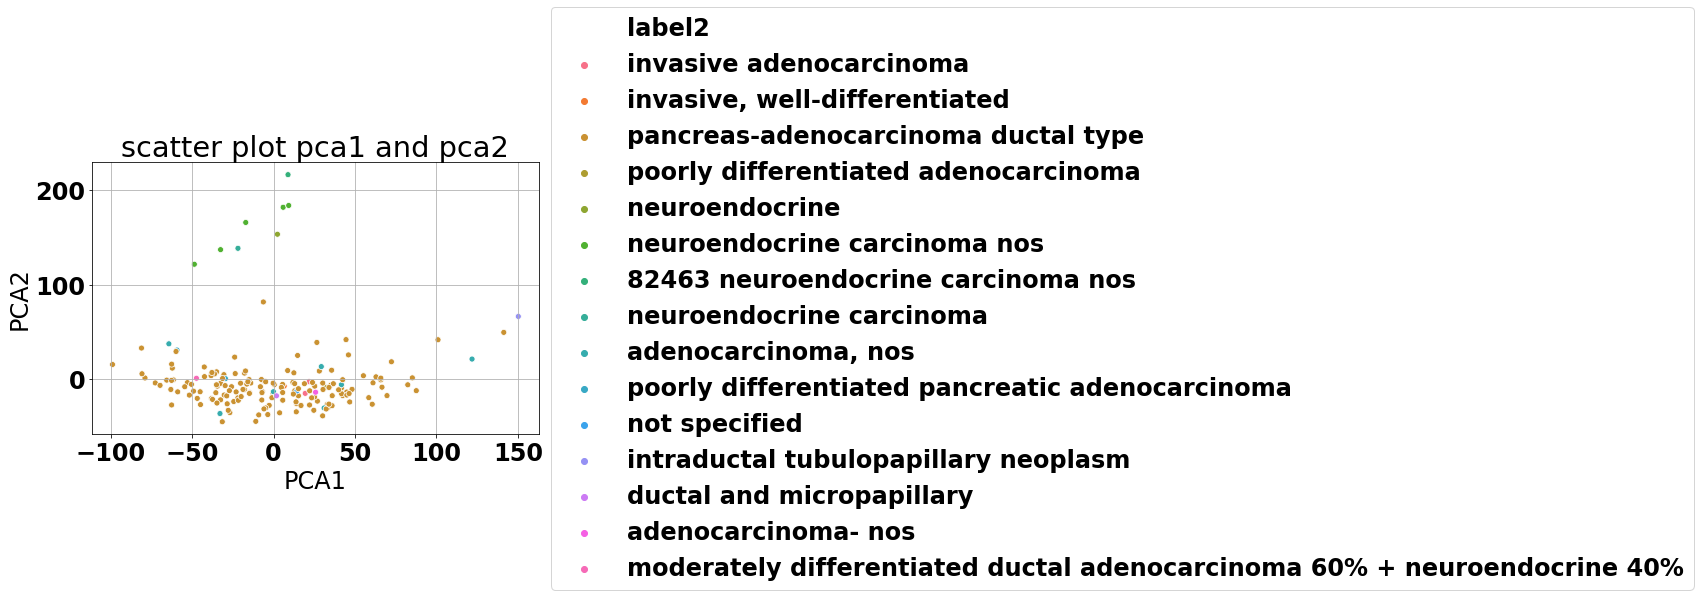

In [154]:
plt.figure(figsize=(8,5))
ax=sns.scatterplot(df2['PCA1'],df2['PCA2'],hue=df2['label2'])
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('scatter plot pca1 and pca2')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid()
plt.show()

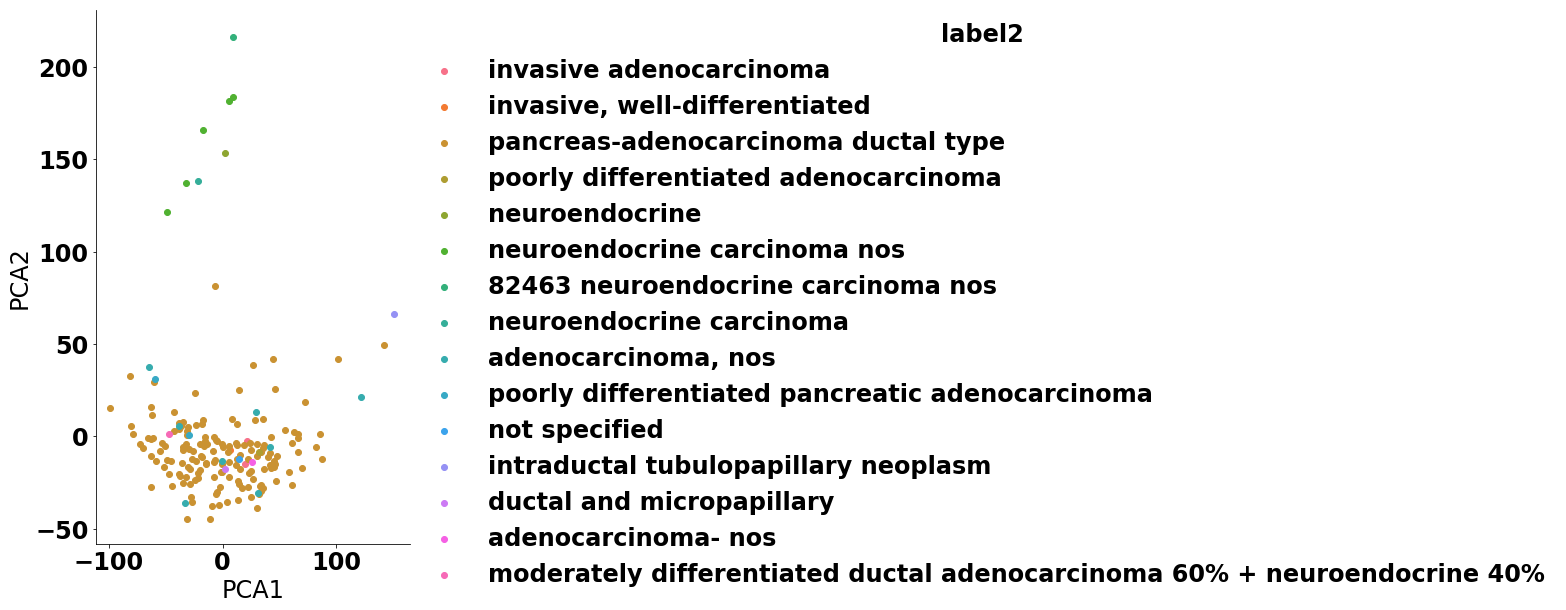

In [155]:
g =sns.FacetGrid(df2,hue='label2',height=9)
g.map(plt.scatter,'PCA1', 'PCA2').add_legend()
plt.show()

In [156]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(df2['label2'])

In [157]:
def myplot(score,coeff,labels,y):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    from matplotlib.pyplot import figure
    figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
    plt.scatter(xs * scalex,ys * scaley, c = y)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
    
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

IndexError: index 183 is out of bounds for axis 0 with size 183

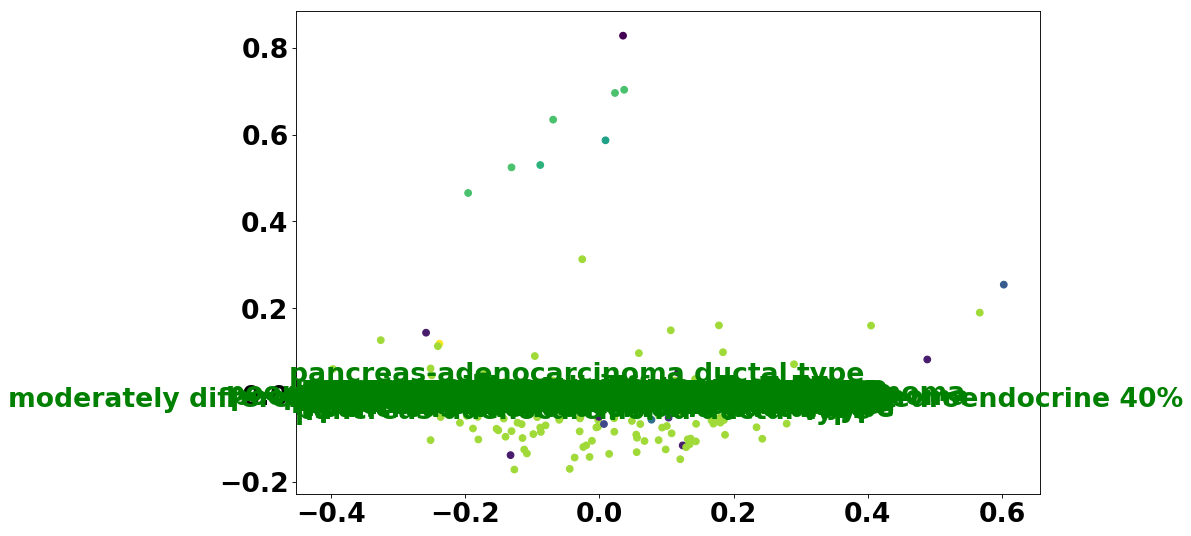

In [158]:
myplot(df[:,0:2],np.transpose(pca.components_[0:2, :]),df2['label2'].values,y)
plt.show()

What does the analysis say about the general behaviour of the different samples?

 Ans:- Adenocarcinoma sample are forming dense cluster while other one is showing greater variation like
       Neuroendocrine showing low denser.

Are the neuroendocrine tumors clearly separable from the adenocarcinoma tumors?

Ans:- some neuroendocrinCe tumors are clrearly separable from adenocarcinoma tumors but
       very few are overlapped with adenocarcinoma tumors.

What can be said about the variance of the PCA
  Ans:- 96% variance is captured on eigen vector value 125.

# QUESTION 2

In [159]:
# reading file
ifn = pd.read_csv('type1_IFN.txt', sep=" ", header=None)
ifn.columns = ['member']
ifn.head()

,member
0,IFIT1
1,IFI44
2,IFIT3
3,MX2
4,OAS1


In [187]:
ifn_data = [ifn['member'].to_list()]

In [188]:
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA as sklearnPCA

In [189]:
hx.tail(5)

cid,aab1-Primary solid Tumor,aab4-Primary solid Tumor,aab6-Primary solid Tumor,aab8-Primary solid Tumor,aab9-Primary solid Tumor,aaba-Primary solid Tumor,aabe-Primary solid Tumor,aabf-Primary solid Tumor,aabh-Primary solid Tumor,aabi-Primary solid Tumor,...,aauh-Primary solid Tumor,aaui-Primary solid Tumor,aaul-Primary solid Tumor,a8t3-Primary solid Tumor,a8t5-Primary solid Tumor,a89d-Solid Tissue Normal,a89d-Primary solid Tumor,a8sy-Primary solid Tumor,a8lh-Primary solid Tumor,aapl-Primary solid Tumor
OAS2,11.5,11,11.8,11.4,9.1,9.9,10.5,12.1,9,8.9,...,9.3,9,10.5,9.5,10,10.1,10.5,11.3,12.1,12
PSME1,12.3,12.3,12,11.7,11.7,11,11.6,11.9,12.2,11.6,...,11.4,11.7,11.1,11.9,11.4,11.9,12,11.5,12.6,12.2
SOCS1,7.7,7.4,7.9,6.8,7.4,6.3,7.3,7.7,6.5,8.4,...,7.4,7.6,7.2,7.4,7.2,7.2,7.2,7.3,6,8.8
STAT2,11.2,11.3,12,11.7,11.1,11.6,11.4,11.8,10.9,11,...,11.3,11,11.3,11.4,11.1,11.3,11.1,11.8,10.8,11.7
histological_type,pancreas-adenocarcinoma-other subtype,pancreas-adenocarcinoma-other subtype,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma-other subtype,pancreas-adenocarcinoma-other subtype,...,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma-other subtype,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type


In [190]:
X=hx.T

In [191]:
X.iloc[:,1:].values

array([[9.399999618530273, 10.0, 9.800000190734863, ...,
        7.699999809265137, 11.199999809265137,
        'pancreas-adenocarcinoma-other subtype'],
       [11.100000381469727, 10.800000190734863, 10.699999809265137, ...,
        7.400000095367432, 11.300000190734863,
        'pancreas-adenocarcinoma-other subtype'],
       [11.199999809265137, 11.600000381469727, 11.0, ...,
        7.900000095367432, 12.0, 'pancreas-adenocarcinoma ductal type'],
       ...,
       [10.600000381469727, 10.5, 11.399999618530273, ...,
        7.300000190734863, 11.800000190734863,
        'pancreas-adenocarcinoma ductal type'],
       [10.800000190734863, 10.699999809265137, 11.5, ..., 6.0,
        10.800000190734863, 'pancreas-adenocarcinoma ductal type'],
       [10.899999618530273, 10.199999809265137, 10.899999618530273, ...,
        8.800000190734863, 11.699999809265137,
        'pancreas-adenocarcinoma ductal type']], dtype=object)

In [192]:
x1=X.groupby('histological_type').sum()/X.groupby('histological_type').count()

In [193]:
x1.head(5)

,IFIT1,IFI44,IFIT3,MX2,OAS1,OAS3,BST2,IFITM1,MX1,STAT1,...,IFIH1,IFIT2,IFITM2,IRF1,IRF9,ISG15,OAS2,PSME1,SOCS1,STAT2
histological_type,,,,,,,,,,,,,,,,,,,,,
pancreas-adenocarcinoma ductal type,9.181457,9.403974,9.670199,9.605960,10.250331,10.668212,11.466225,11.603311,11.093377,12.068212,...,9.417881,8.663576,12.055629,10.462252,10.666887,10.400662,10.360927,11.888742,6.851656,11.113907
pancreas-adenocarcinoma-other subtype,8.696296,8.374074,8.974074,8.862963,9.444444,9.996296,10.866667,10.862963,10.477778,11.414815,...,8.914815,7.959259,11.385185,10.170370,10.340741,9.692593,9.411111,11.703704,7.033333,10.885185
pancreas-colloid (mucinous non-cystic) carcinoma,8.800000,9.225000,9.825000,9.500000,10.625000,10.800000,10.375000,11.225000,11.025000,12.075000,...,9.575000,8.800000,11.275000,11.200000,10.325000,9.900000,10.450000,11.850000,7.100000,10.975000
pancreas-undifferentiated carcinoma,8.000000,9.700000,9.500000,8.200000,8.600000,10.000000,11.600000,12.900000,9.500000,12.500000,...,8.300000,8.400000,12.700000,10.700000,10.400000,10.200000,9.900000,11.600000,8.100000,11.300000


In [194]:
x2=pd.DataFrame(x1,index=None,columns=None).T

In [195]:
x2.head()

histological_type,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma-other subtype,pancreas-colloid (mucinous non-cystic) carcinoma,pancreas-undifferentiated carcinoma
IFIT1,9.181457,8.696296,8.800,8.0
IFI44,9.403974,8.374074,9.225,9.7
IFIT3,9.670199,8.974074,9.825,9.5
MX2,9.605960,8.862963,9.500,8.2
OAS1,10.250331,9.444444,10.625,8.6


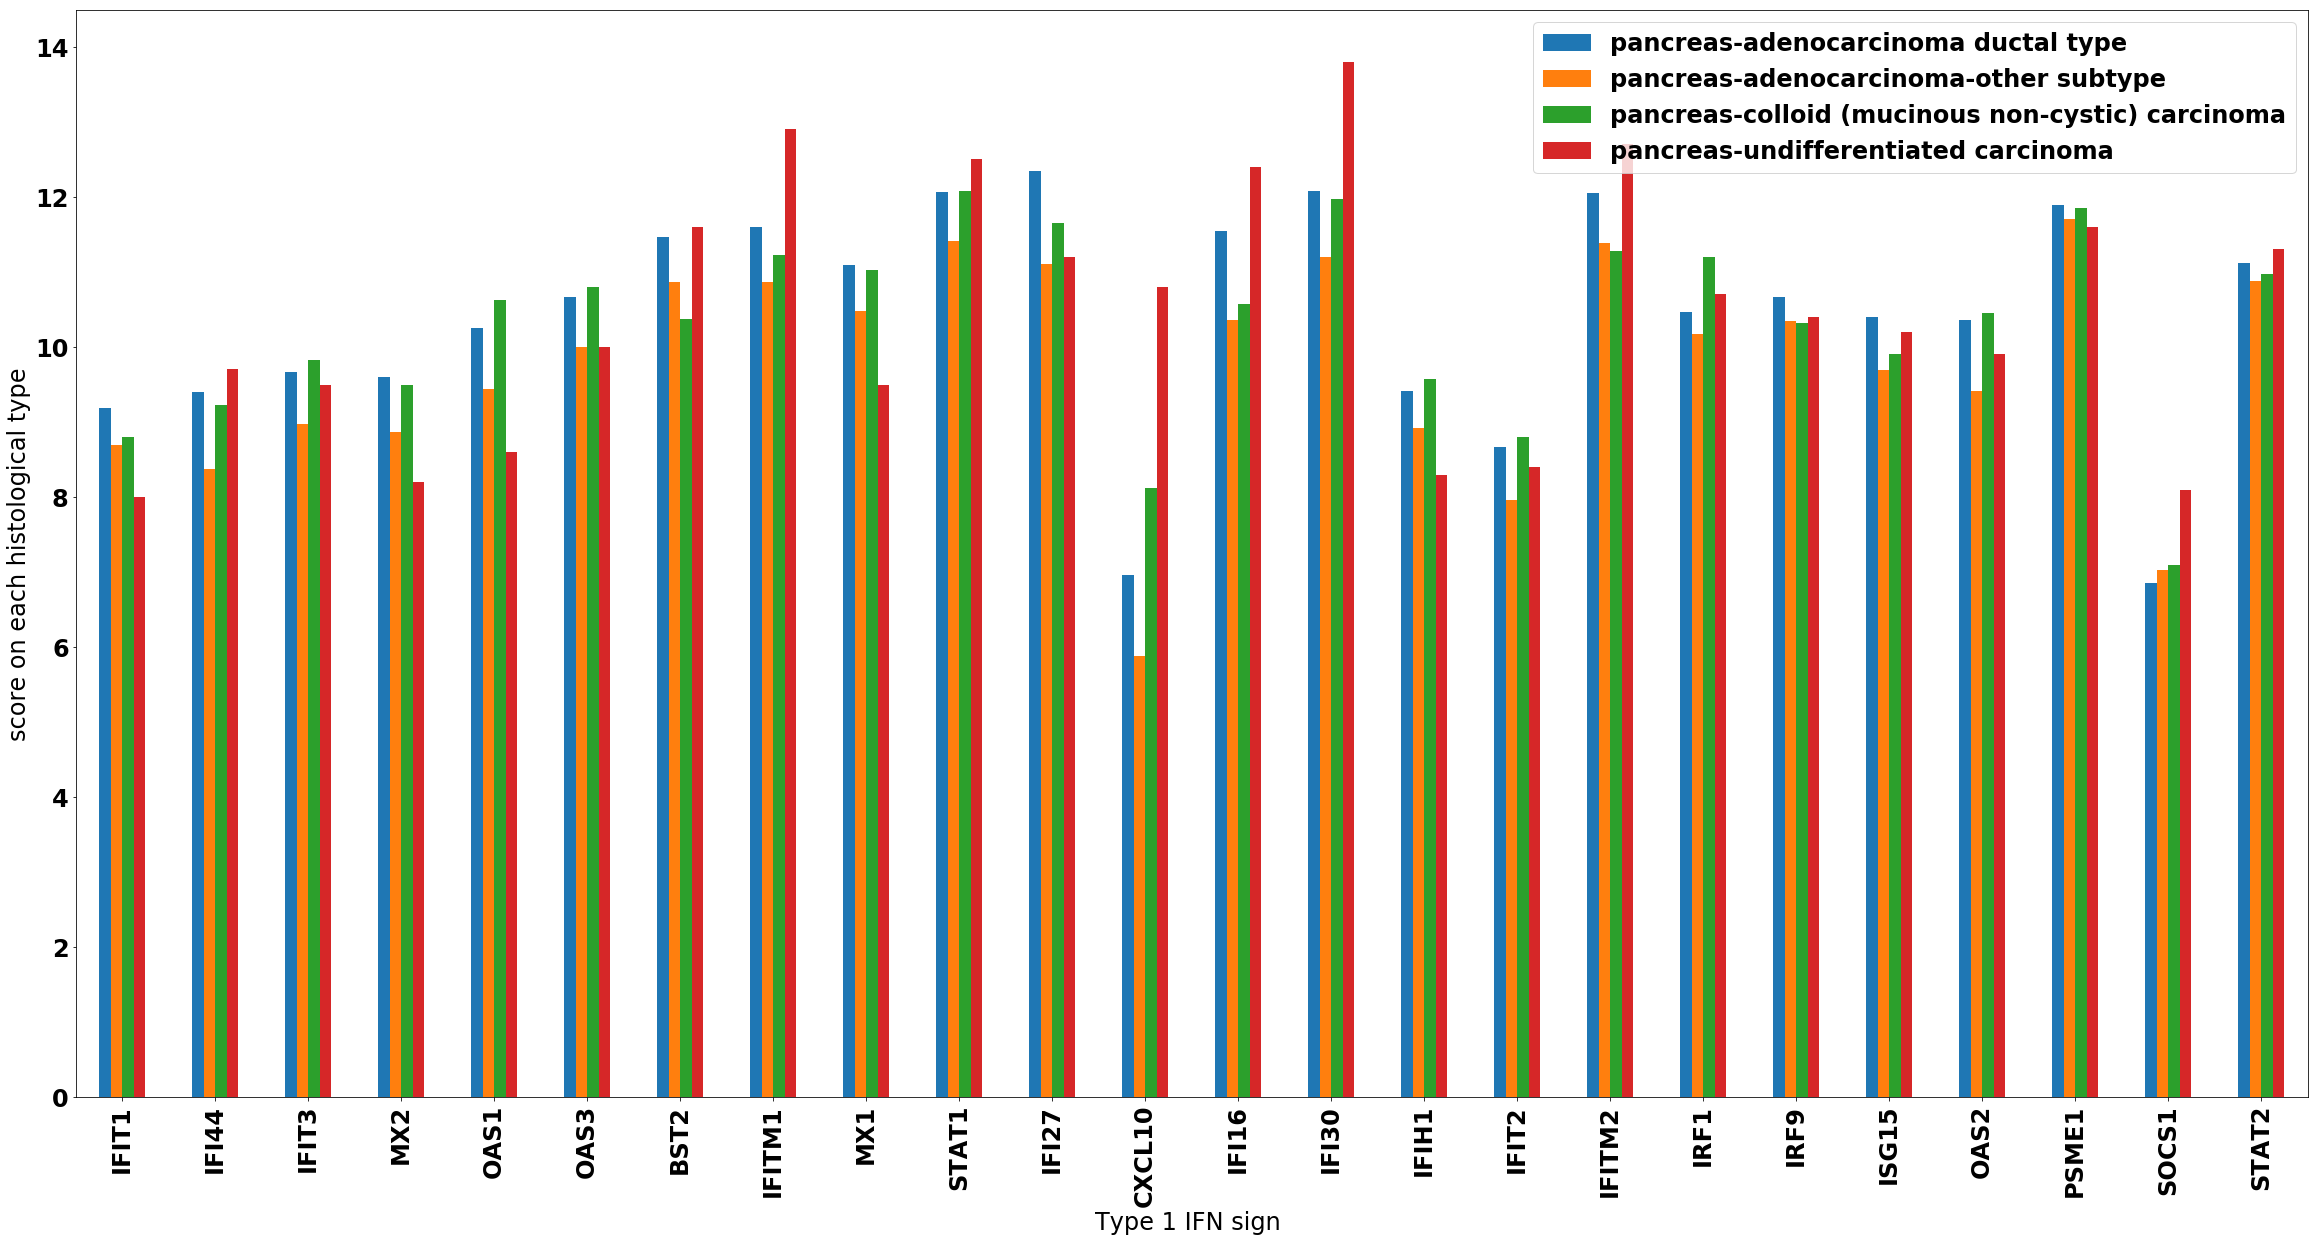

In [196]:
#plotting barpgraph of each inferon in histological type
font = {'family' : 'Sans serif',
        'weight' : 'bold',
        'size'  : 24}
plt.rc('font', **font )
ax=x2.plot.bar(figsize = (40,20))
plt.xlabel('Type 1 IFN sign ')
plt.ylabel('score on each histological type')
ax.legend()
plt.show()

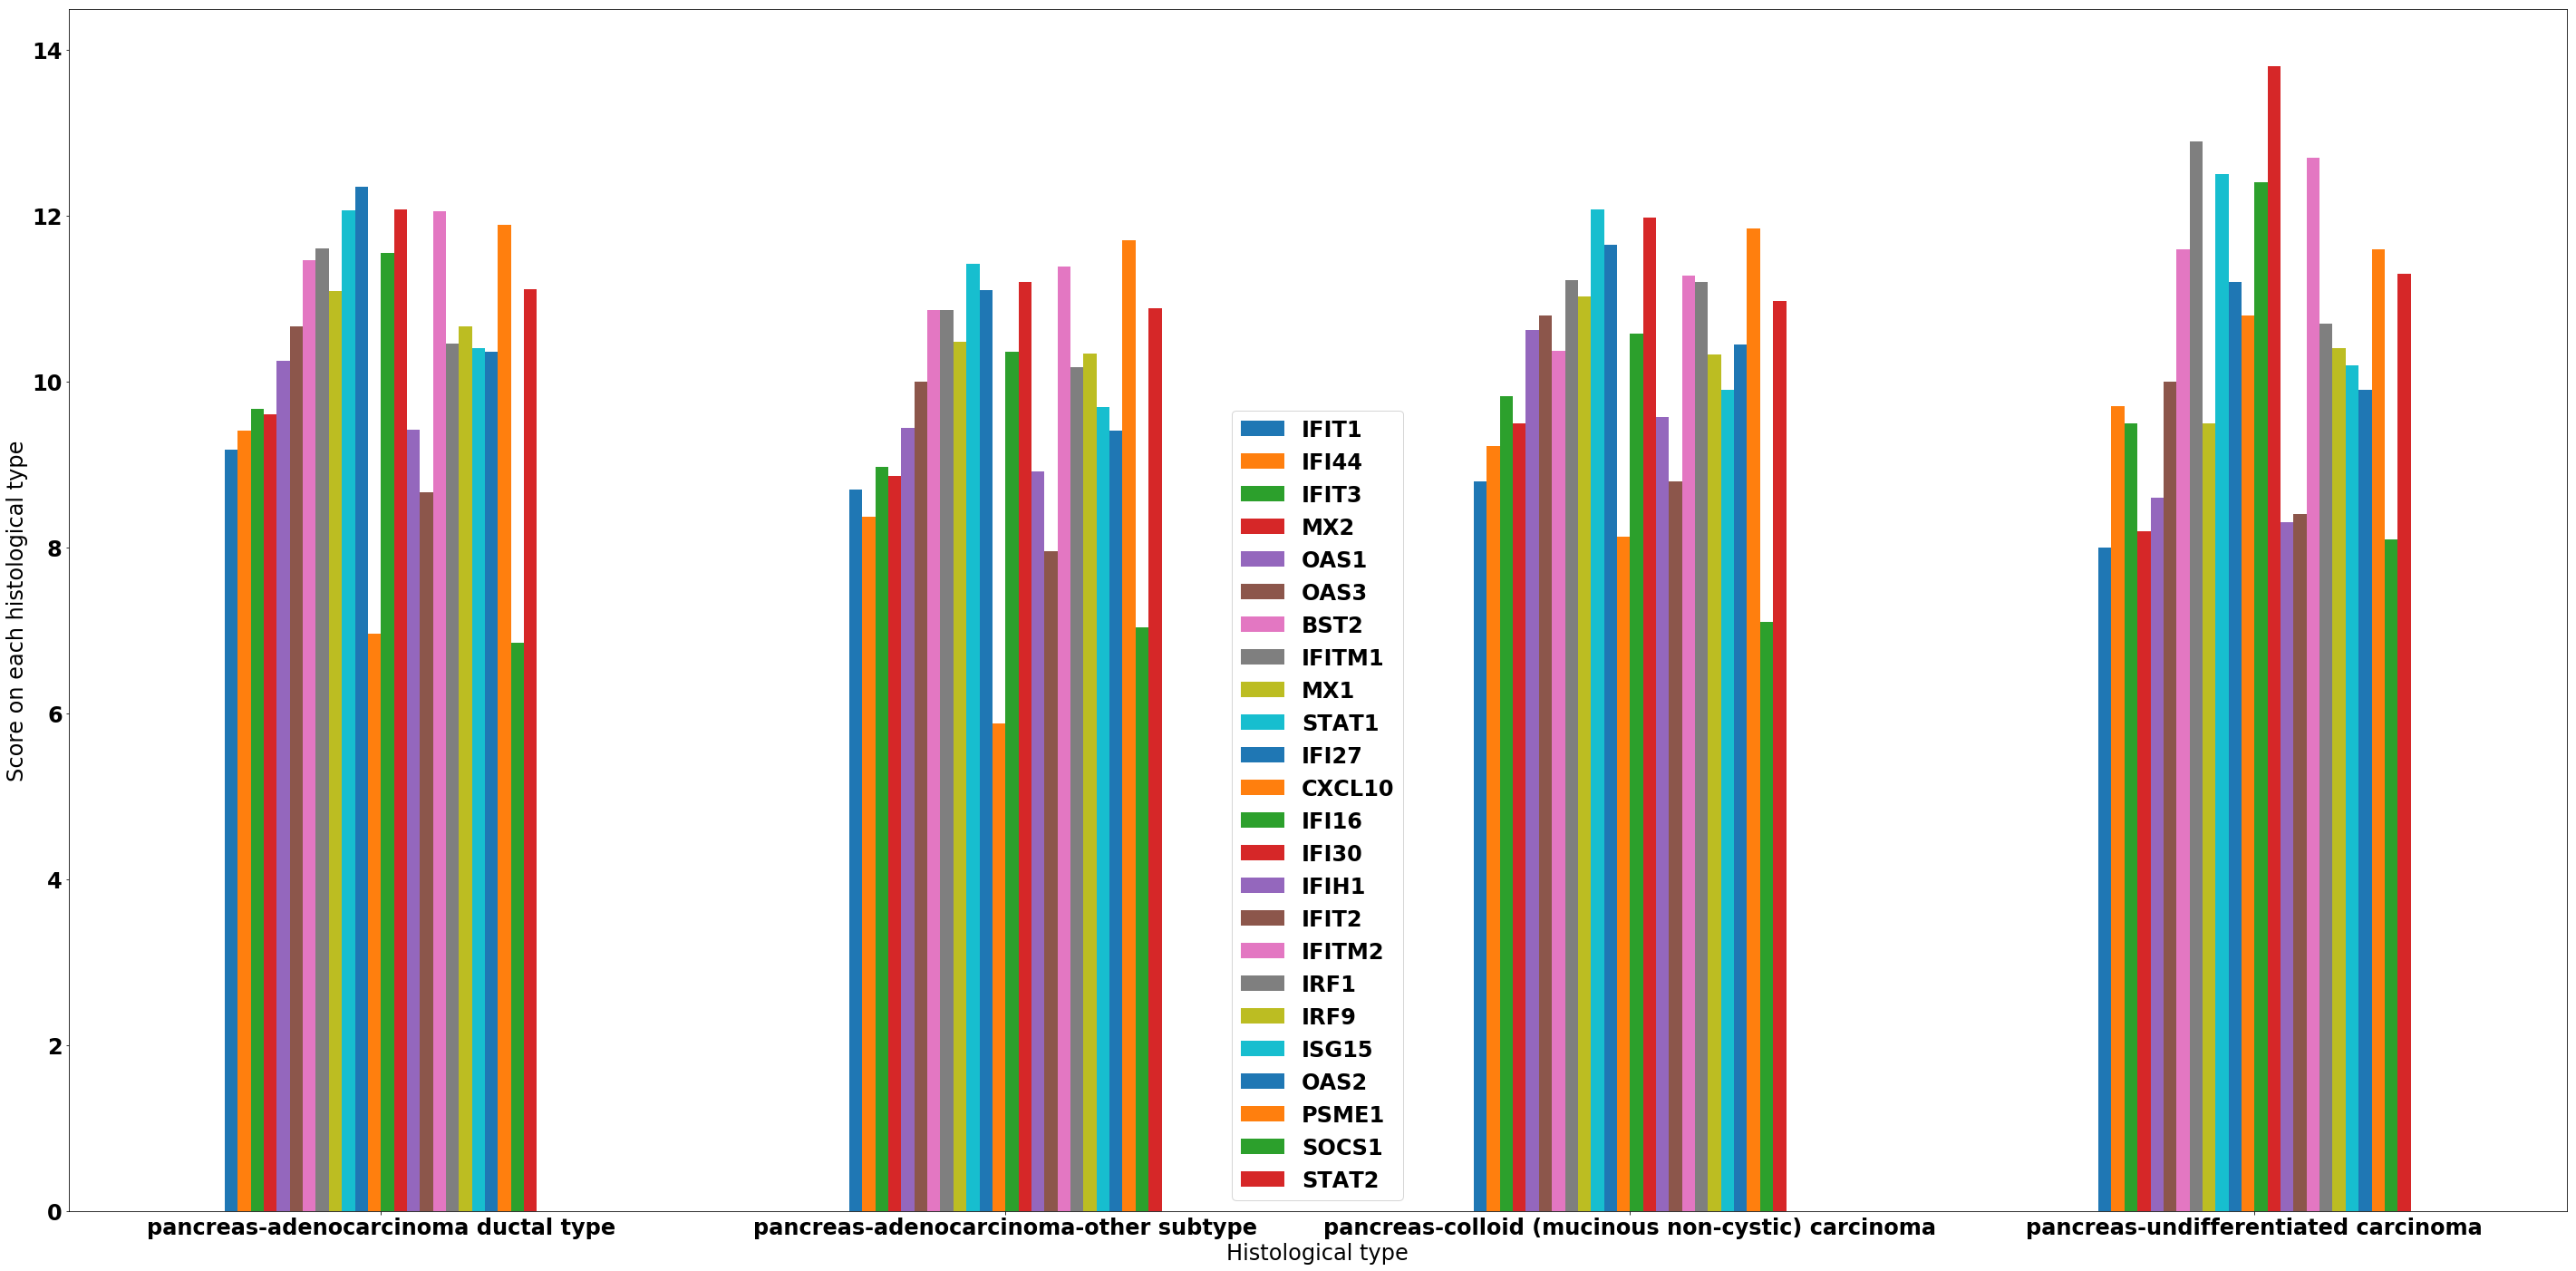

In [197]:
#plotting bar plot of histological type and their correspnding inferons score
ax=x2.T.plot.bar(figsize = (40, 20),rot=0)
# for p in ax.patches:
#     ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.xlabel('Histological type')
plt.ylabel('Score on each histological type')
plt.tight_layout()
plt.show()

In [174]:
!pip install GSVA

# ● Check distribution of GSVA scores for samples. Do the GSVA scores segregate samples into subtypes?


Even after trying so much could'nt make the GSVA algorithm work on the gene expression data set.

# Final Conclusion of the analysis: 


The gene expression data what we have is definatly hard to work around with. With clear visualizations we could see that saperating endocrine data from the neuroendocrine data is not possible as the 2D - PCA plot is very mixed. The plot of gene-expression data shows that our data points are much uniformly spread over the 2D plan which means there is no much correlation seen between the points.